In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\HARUN\Downloads\Mall_Customers.csv")


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

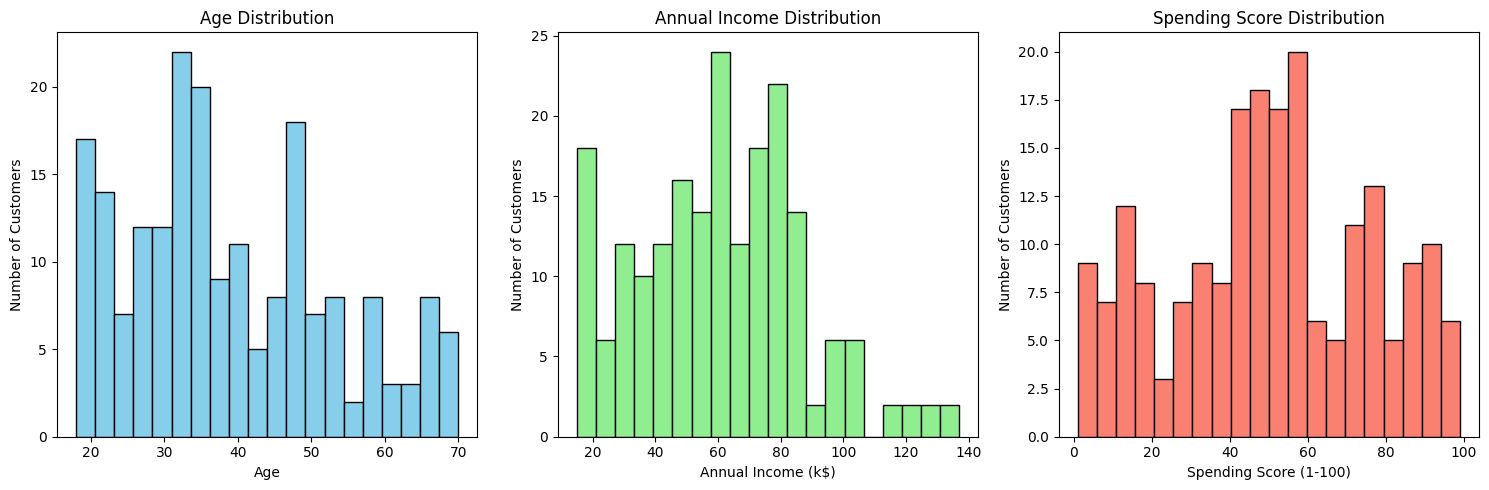

In [7]:
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution")

# Annual Income distribution
plt.subplot(1, 3, 2)
plt.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Number of Customers")
plt.title("Annual Income Distribution")

# Spending Score distribution
plt.subplot(1, 3, 3)
plt.hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black')
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Number of Customers")
plt.title("Spending Score Distribution")

plt.tight_layout()  # Prevents overlap between plots
plt.show()


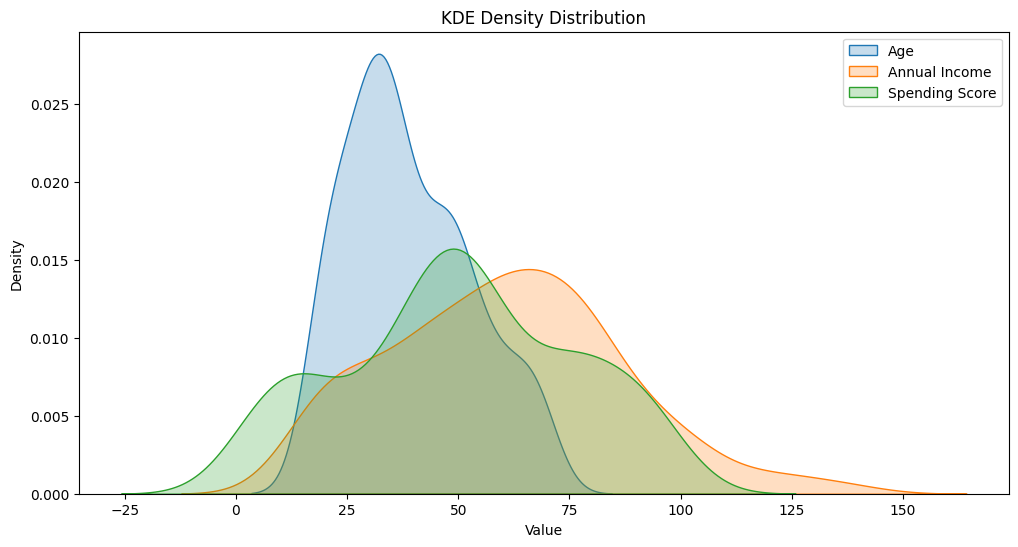

In [8]:
plt.figure(figsize=(12, 6))

sns.kdeplot(df['Age'], label='Age', fill=True)
sns.kdeplot(df['Annual Income (k$)'], label='Annual Income', fill=True)
sns.kdeplot(df['Spending Score (1-100)'], label='Spending Score', fill=True)

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("KDE Density Distribution")
plt.legend()
plt.show()


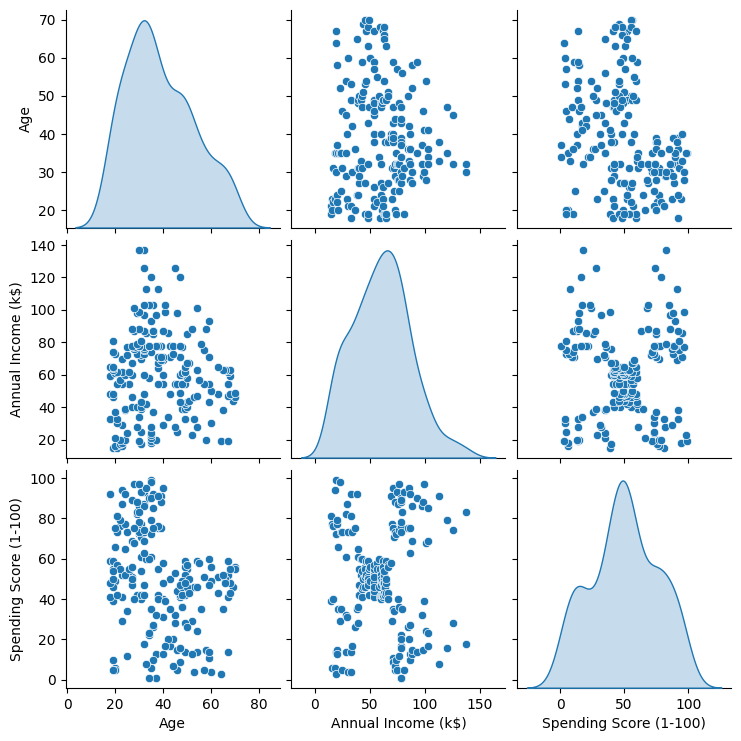

In [9]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()


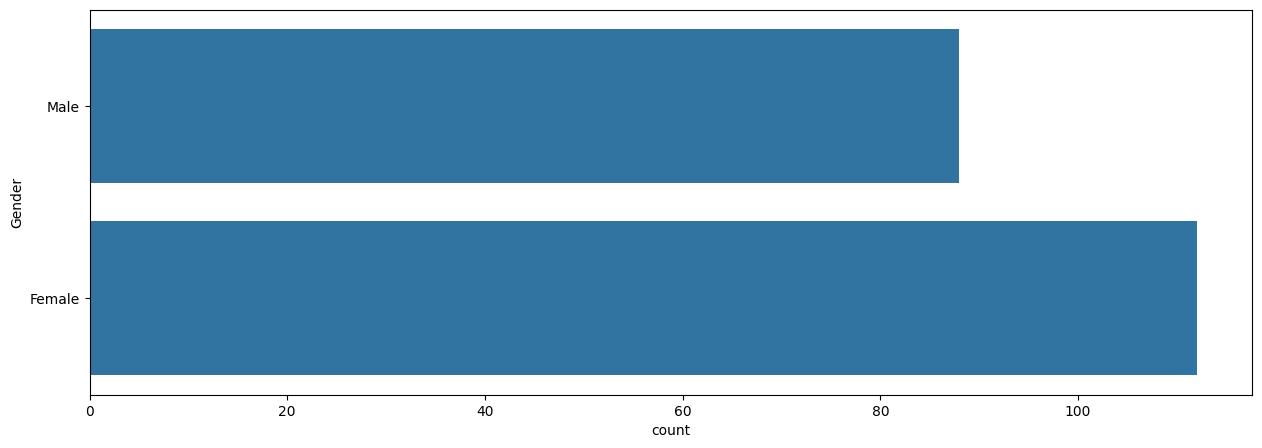

In [10]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

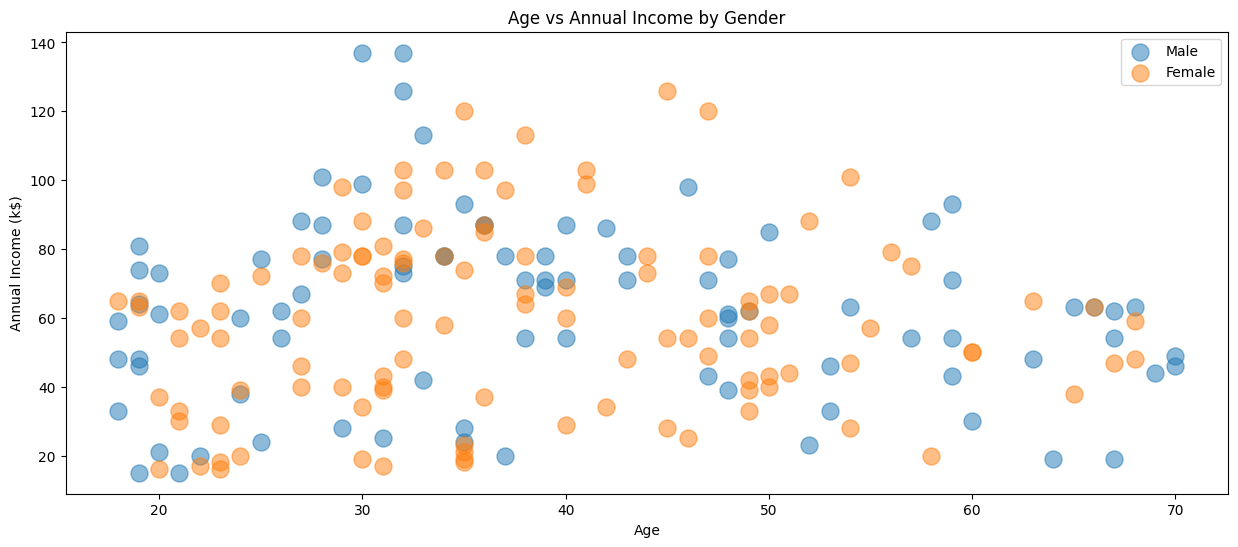

In [11]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 150 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income by Gender')
plt.legend()
plt.show()

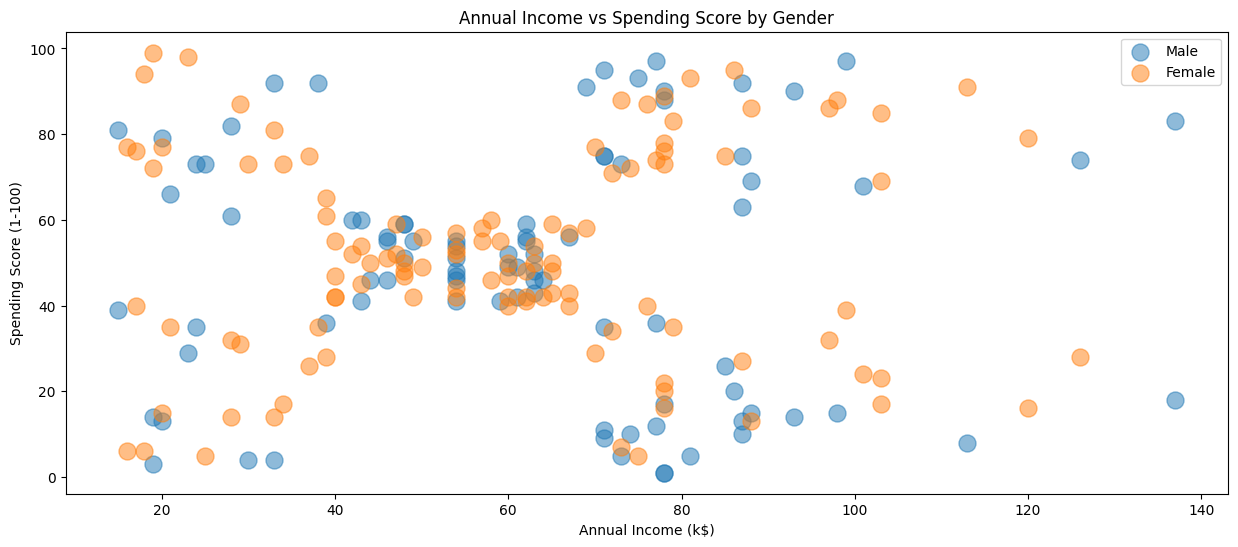

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 150 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score by Gender')
plt.legend()
plt.show()

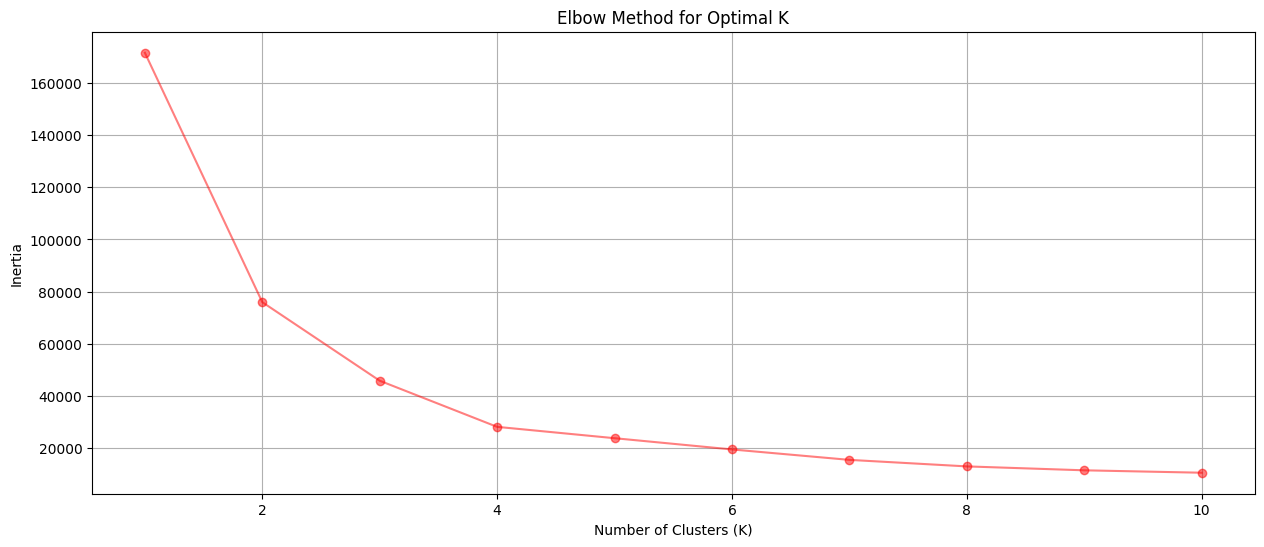

In [13]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(figsize=(15,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='r',alpha = 0.5)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


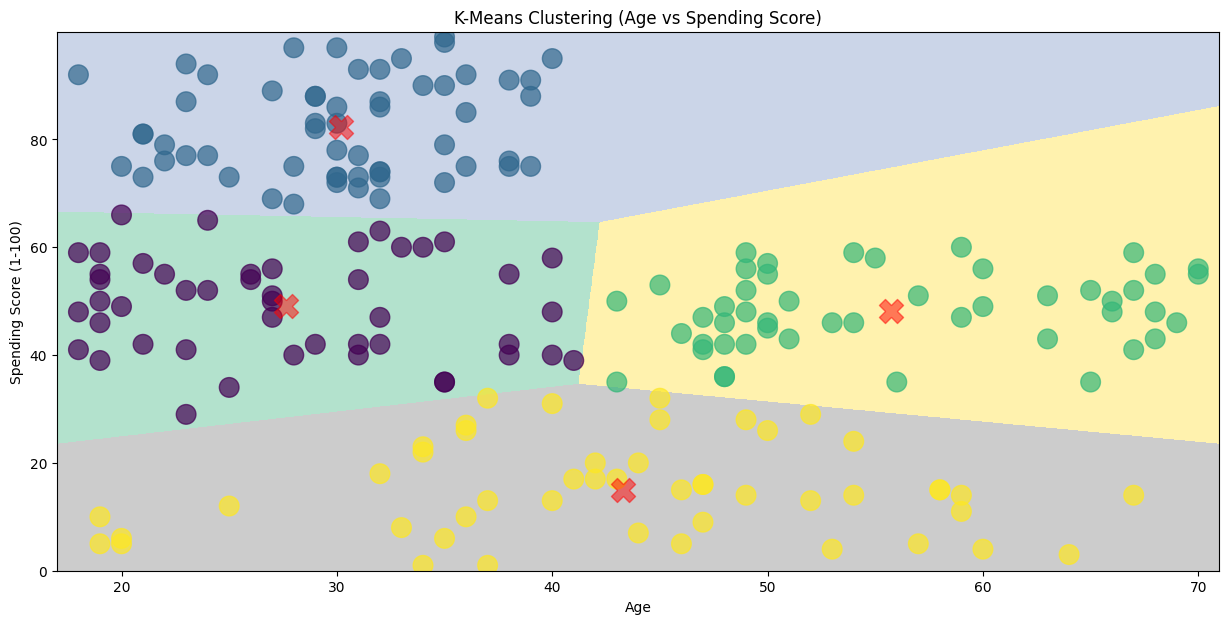

In [14]:
X1 = df[['Age', 'Spending Score (1-100)']].values

algorithm = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X1)

labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(15, 7))
plt.clf()

Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(X1[:, 0], X1[:, 1], c=labels1, s=200, alpha=0.7)
plt.scatter(centroids1[:, 0], centroids1[:, 1], s=300, c='red', alpha=0.5, marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (Age vs Spending Score)')
plt.show()

In [15]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

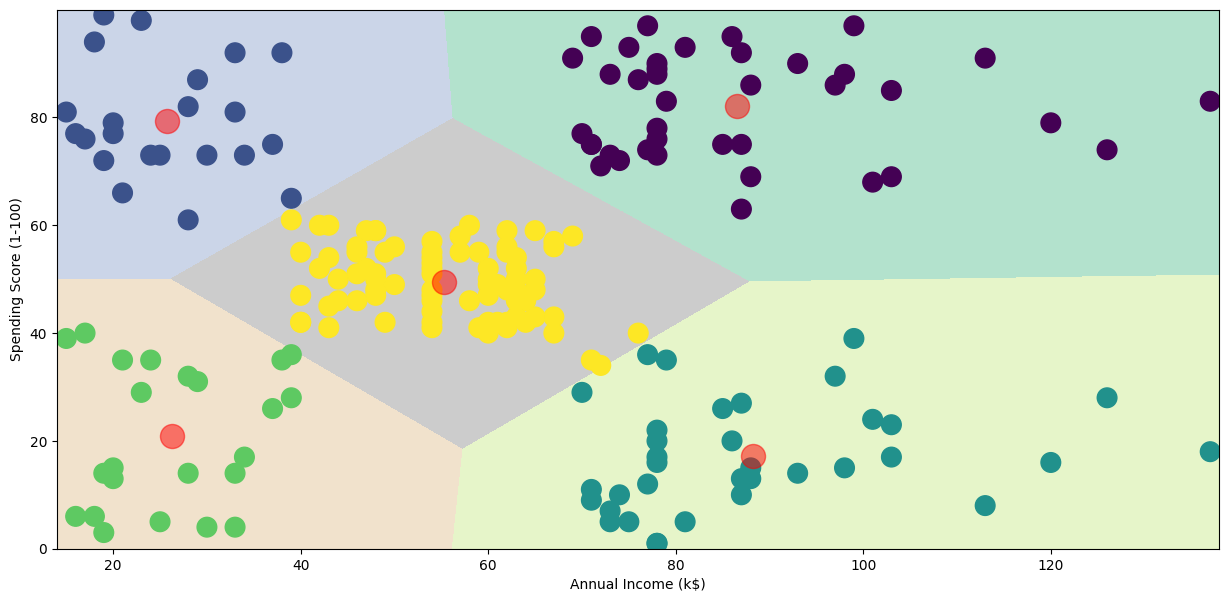

In [16]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

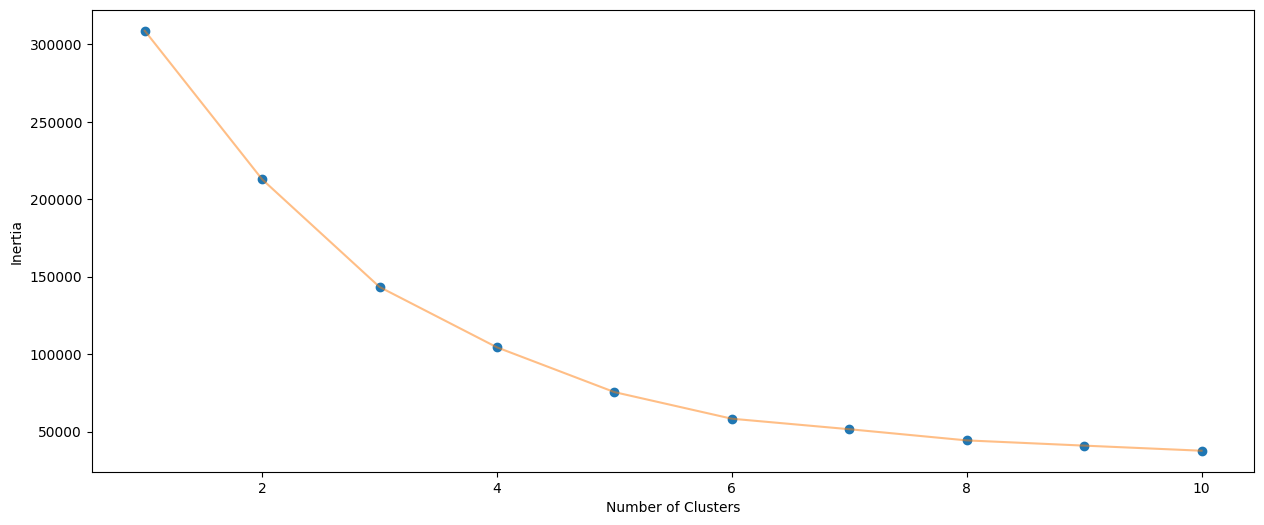

In [17]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)
    plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
    

In [18]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [19]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x=df['Age'],  # X ekseni: Yaş
    y=df['Spending Score (1-100)'],  # Y ekseni: Harcama Skoru
    z=df['Annual Income (k$)'],  # Z ekseni: Yıllık Gelir
    mode='markers',  # Veriyi nokta olarak göster
    marker=dict(
        color=df['label3'],  # Küme etiketlerine göre renk
        size=12,  # Nokta boyutu
        opacity=0.8,  # Şeffaflık
        line=dict(color=df['label3'], width=5)  # Nokta kenarlık renk ve genişliği
    )
)

# Grafiği oluşturuyoruz
layout = go.Layout(
    title='Müşteri Segmentasyonu (Yaş, Harcama Skoru ve Yıllık Gelir)',
    scene=dict(
        xaxis=dict(title='Yaş'),
        yaxis=dict(title='Harcama Skoru (1-100)'),
        zaxis=dict(title='Yıllık Gelir (k$)')
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Kenar boşlukları
)

# Grafik verisini oluşturuyoruz
data = [trace1]

# Grafiği plot ediyoruz
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)